<a href="https://colab.research.google.com/github/aminadli/Pizza-Sales/blob/main/Pizza_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime
from IPython.core.display import display, HTML

# Exploring dataset

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/aminadli/Pizza-Sales/main/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv')

In [12]:
df.shape

(49574, 9)

In [13]:
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


# Dropping first three tables due to the lack of necessity

In [14]:
df.drop(df.columns[:3].tolist(), axis=1, inplace=True)

In [15]:
df.head()

,date,time,name,size,type,price
0,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


# Exploring for NULL data

In [16]:
df.isna().sum()

date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64

# Prices progression over time in 2015

In [17]:
fig = px.line(df, x='date', y='price')
fig.show()

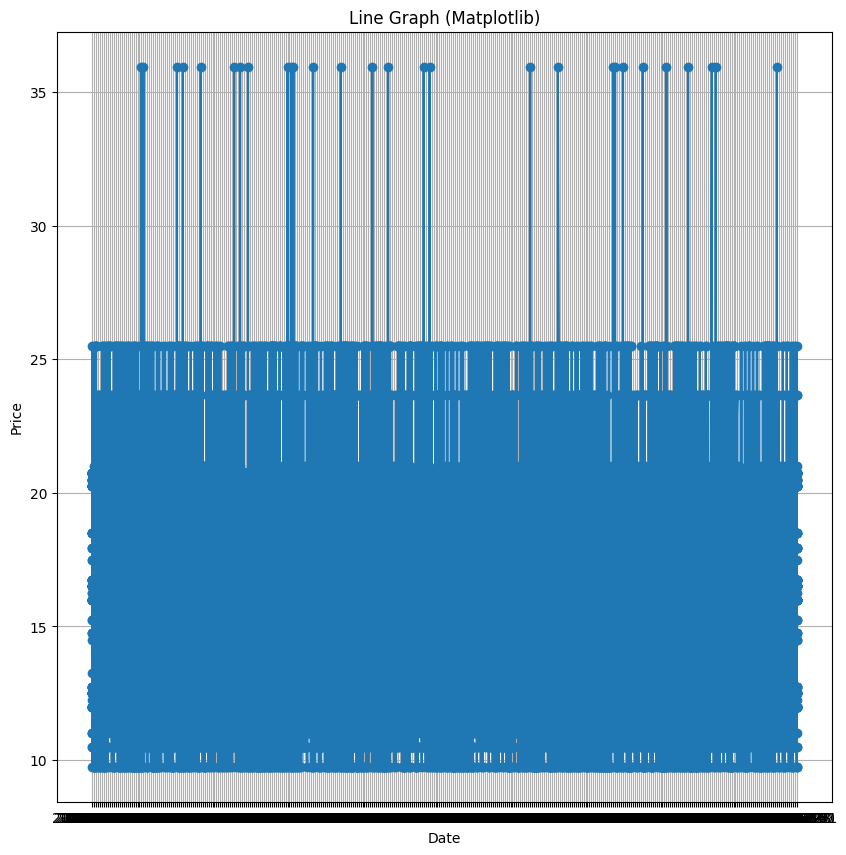

In [18]:
dates = df['date']
prices = df['price']

# Create the plot
plt.figure(figsize=(10, 10))  # Adjust figure size as desired
plt.plot(dates, prices, marker='o', linestyle='-')  # Marker and line style

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Line Graph (Matplotlib)')
plt.grid(True)  # Add gridlines for better readability

# Display the plot
plt.show()

# Most popular pizzas ordered

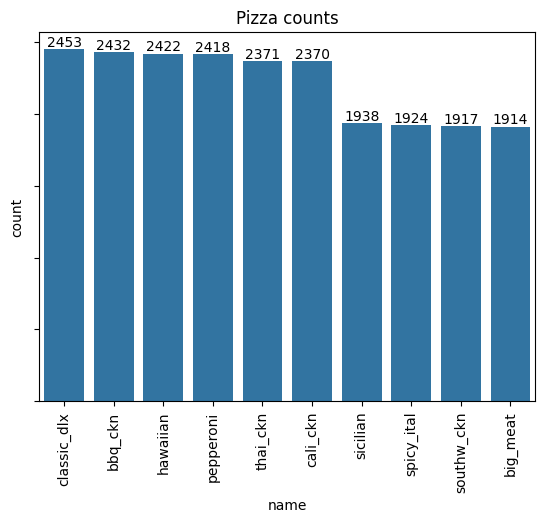

In [19]:
fig, axes = plt.subplots()
count = pd.DataFrame(df["name"].value_counts())
sns.barplot(x=count.index[:10], y=count.iloc[:10, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_title("Pizza counts")
plt.show()

# Most popular pizza types

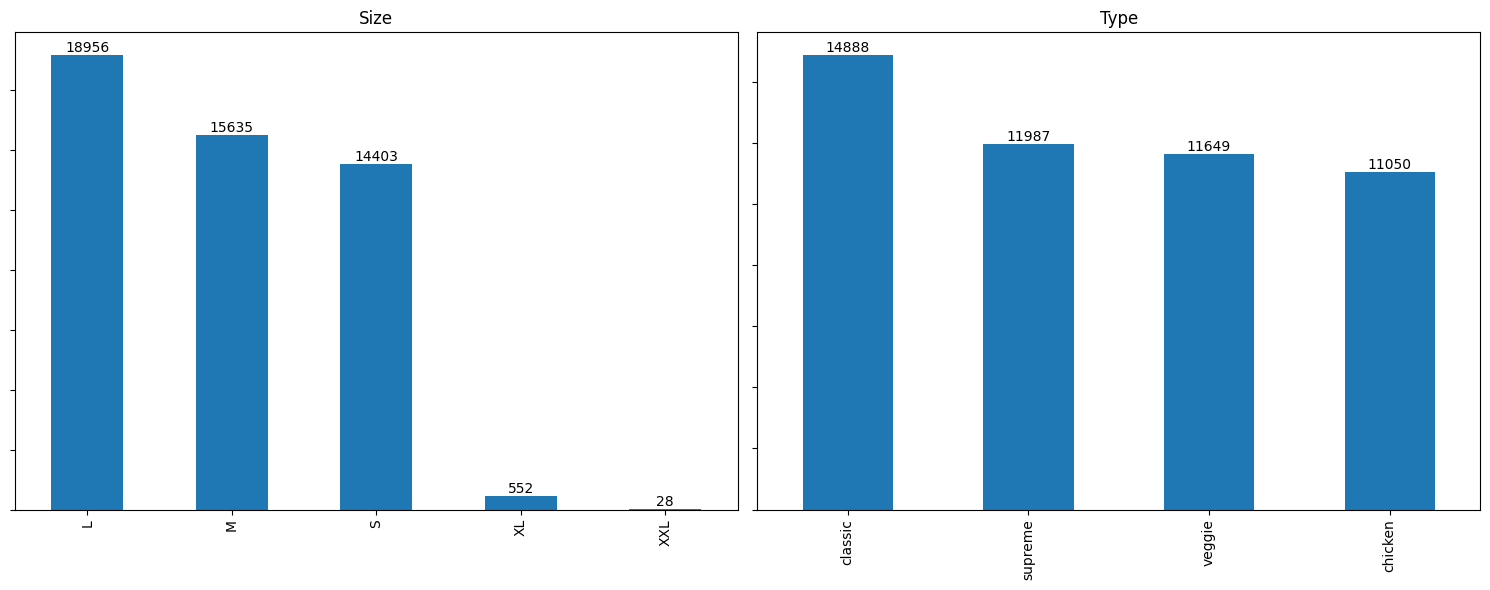

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
for i, j in enumerate(["size", "type"]):
    count = df[j].value_counts()
    count.plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_xlabel("")
    axes[i].set_title(j.capitalize())
plt.tight_layout()
plt.show()

In [21]:
months = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]

def convert_date(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return date.month

# Extracting months from dates

In [22]:
df["months"] = df["date"].apply(convert_date)

# Average price per pizza

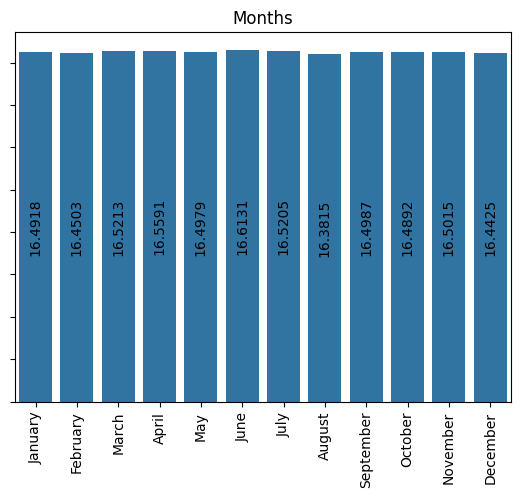

In [23]:
grouped = df.groupby("months")
fig, axes = plt.subplots()
mean = pd.DataFrame(grouped["price"].mean())
dd = {"month": [], "value": []}
for i in range(mean.shape[0]):
    dd["month"] += [months[mean.index[i]-1]]
    dd["value"] += [mean.iloc[i, 0]]
dd = pd.DataFrame(dd)

sns.barplot(x=dd.iloc[:, 0], y=dd.iloc[:, 1], ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Months")
plt.show()

# Top 10 most expensive pizzas on average

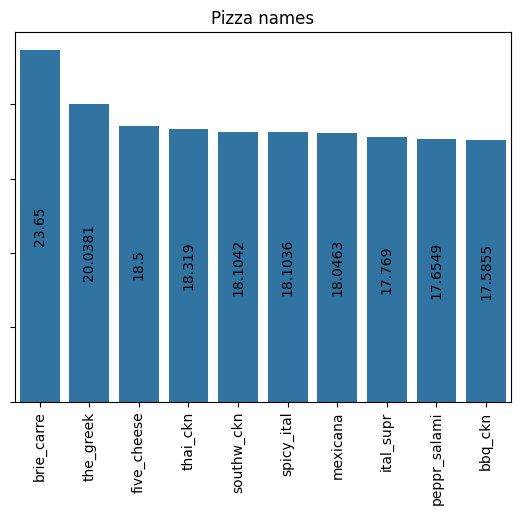

In [24]:
grouped = df.groupby("name")
fig, axes = plt.subplots()
mean = pd.DataFrame(grouped["price"].mean())
mean = mean.sort_values("price", ascending=False)

sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Pizza names")
plt.show()

# Average prices for each pizza type overall

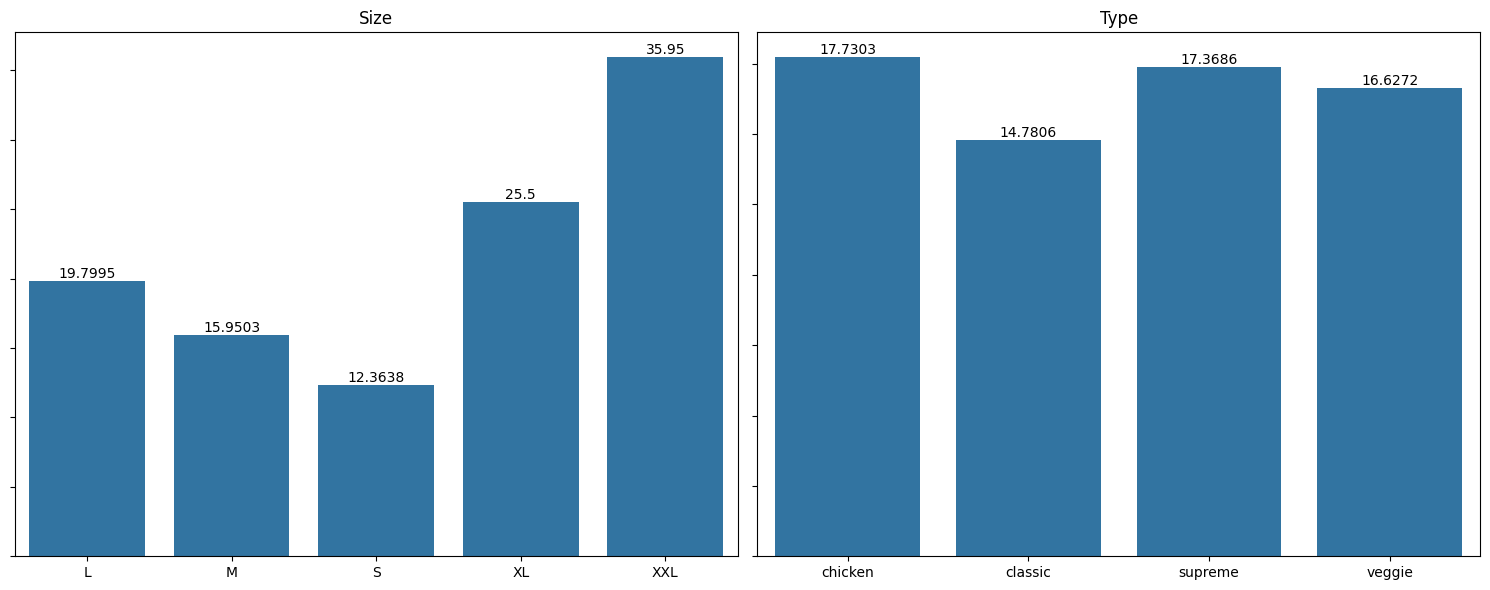

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
for i, j in enumerate(["size", "type"]):
    grouped = df.groupby(j)
    mean = grouped["price"].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_xlabel("")
    axes[i].set_title(j.capitalize())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

# Average prices for different pizza types for each month in 2015

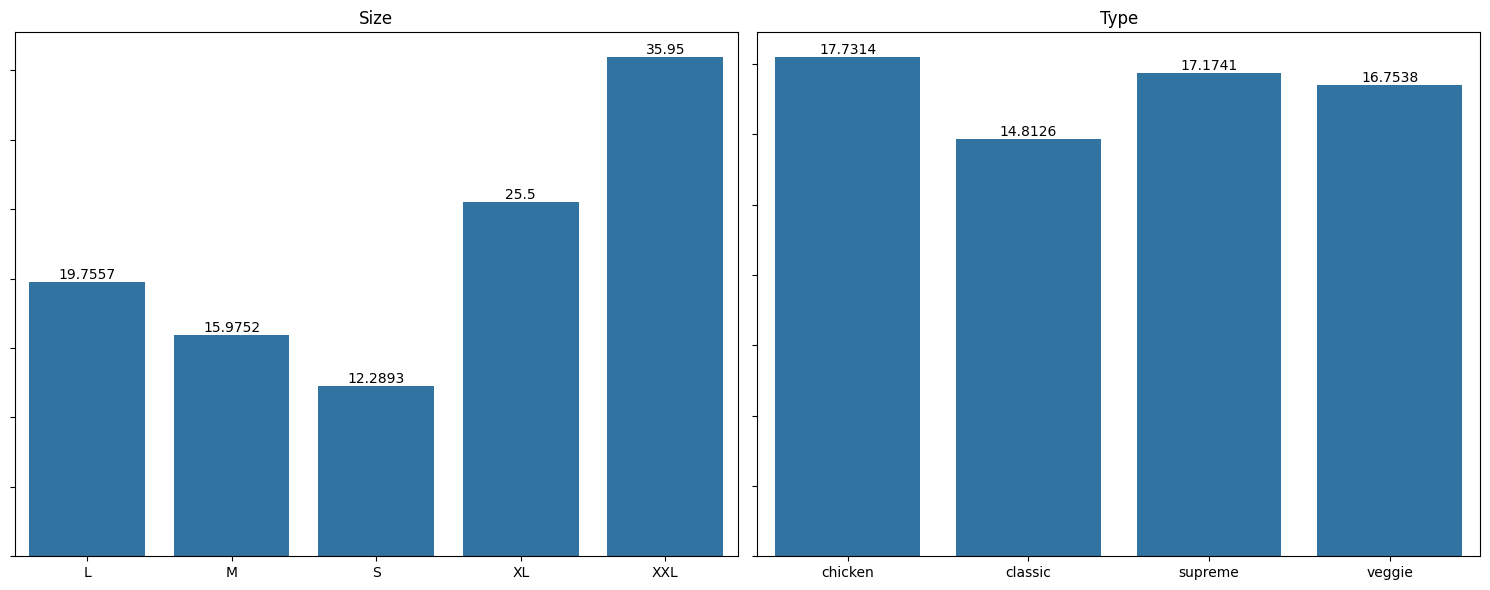

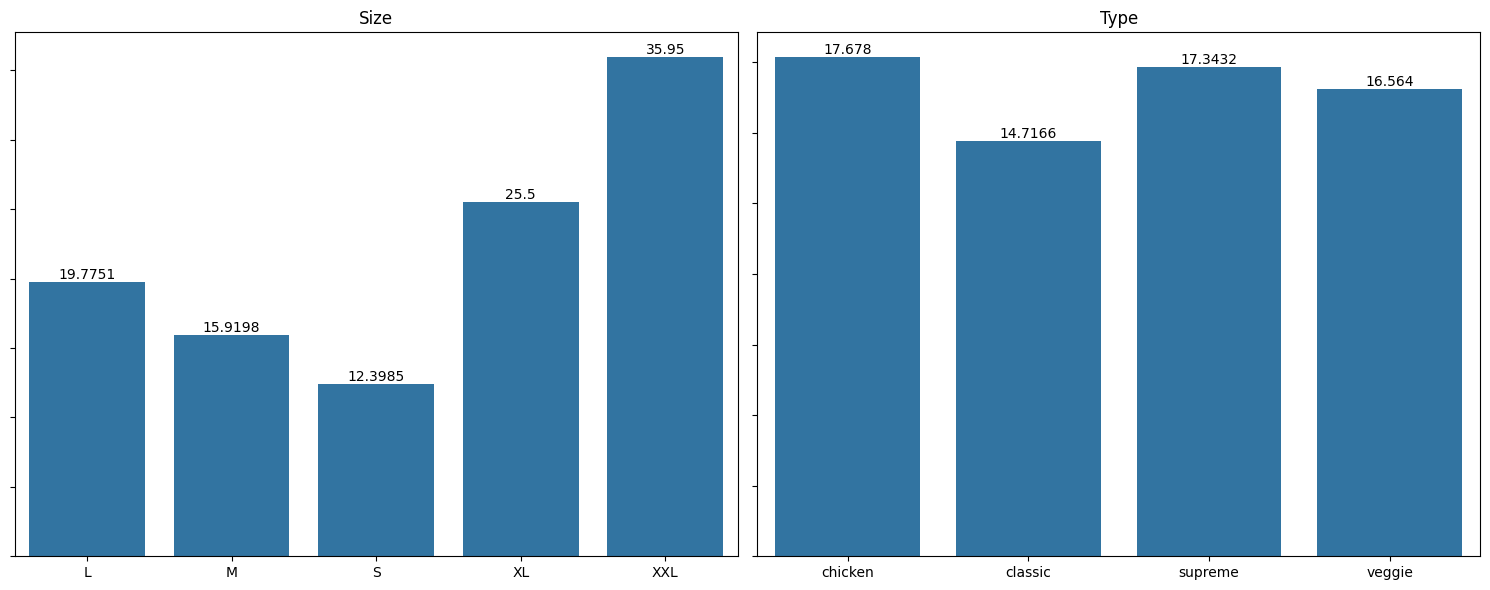

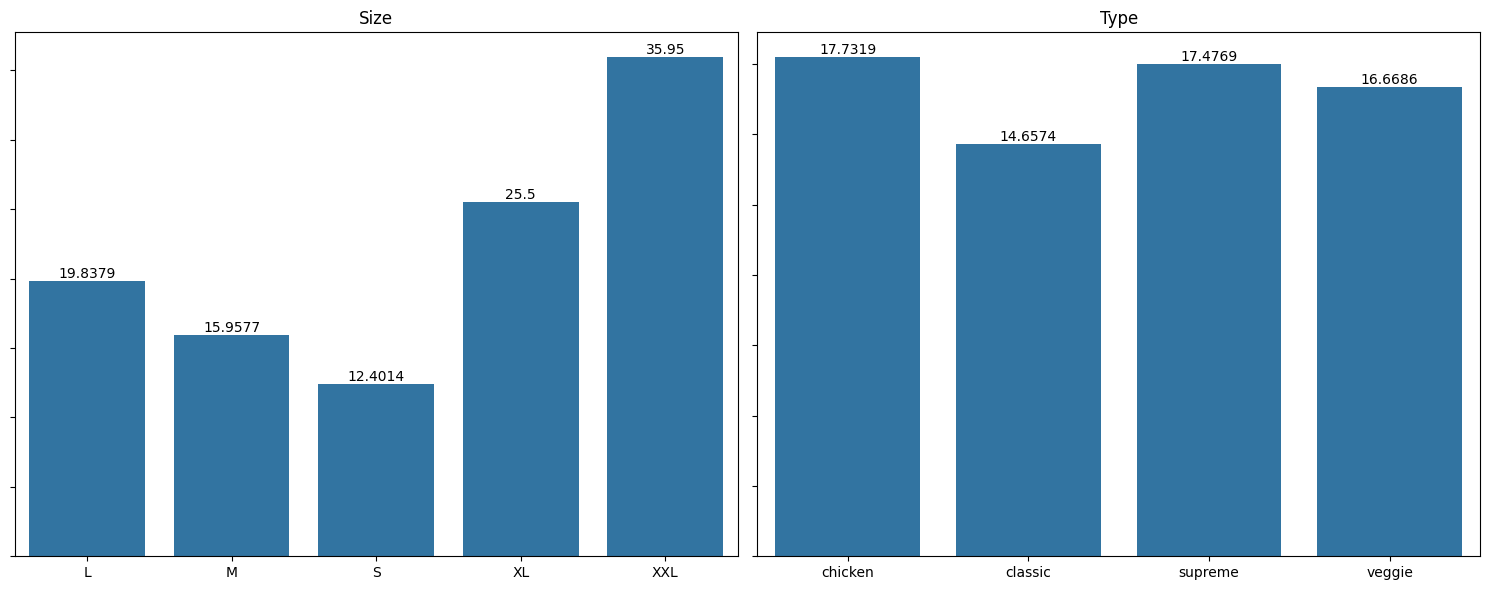

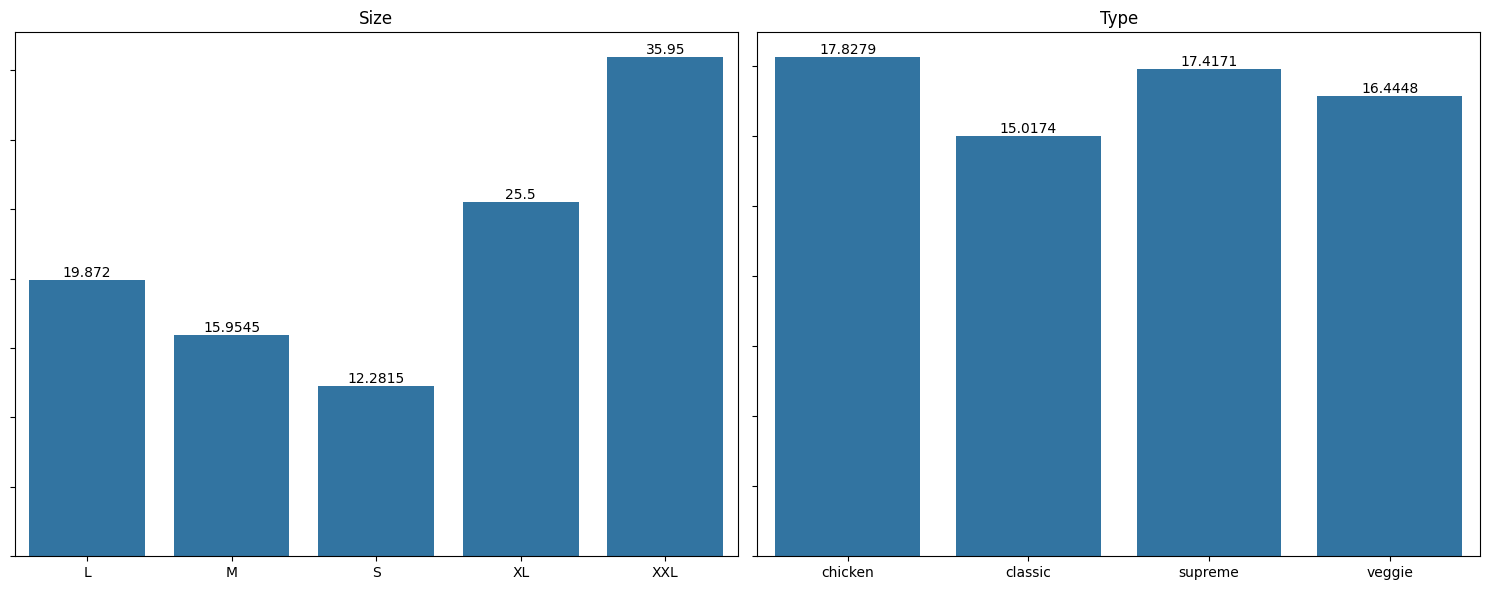

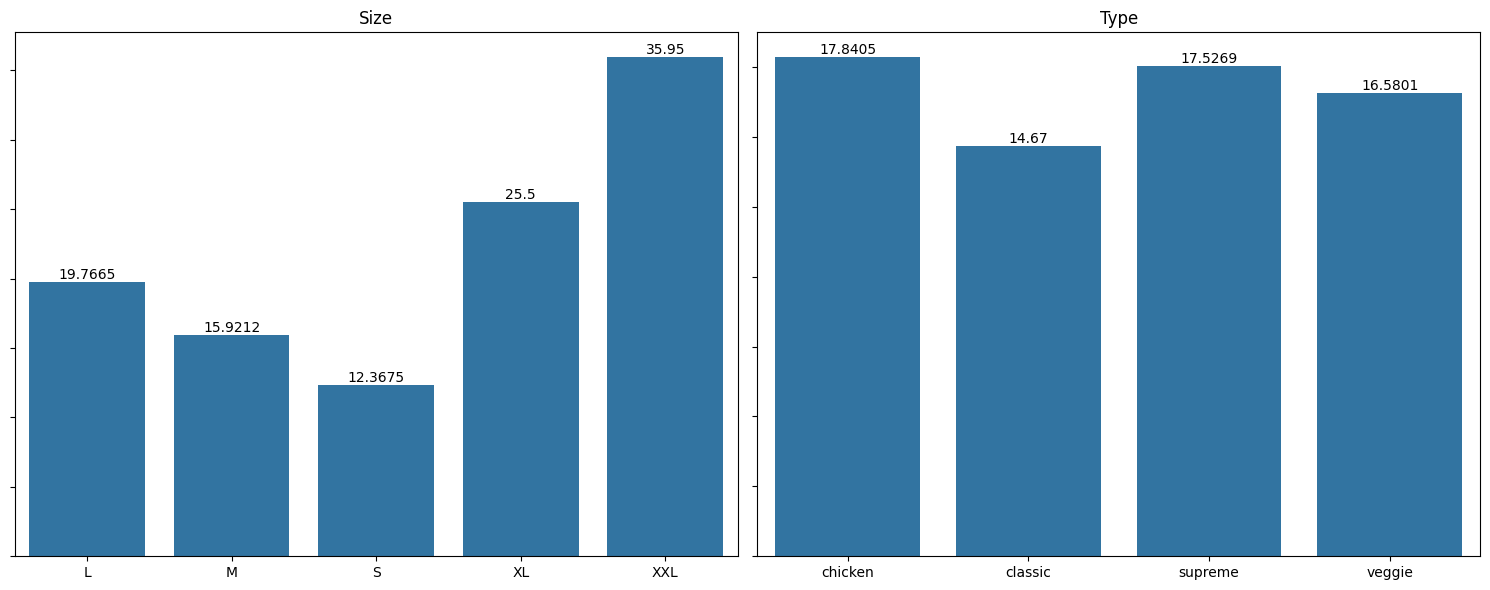

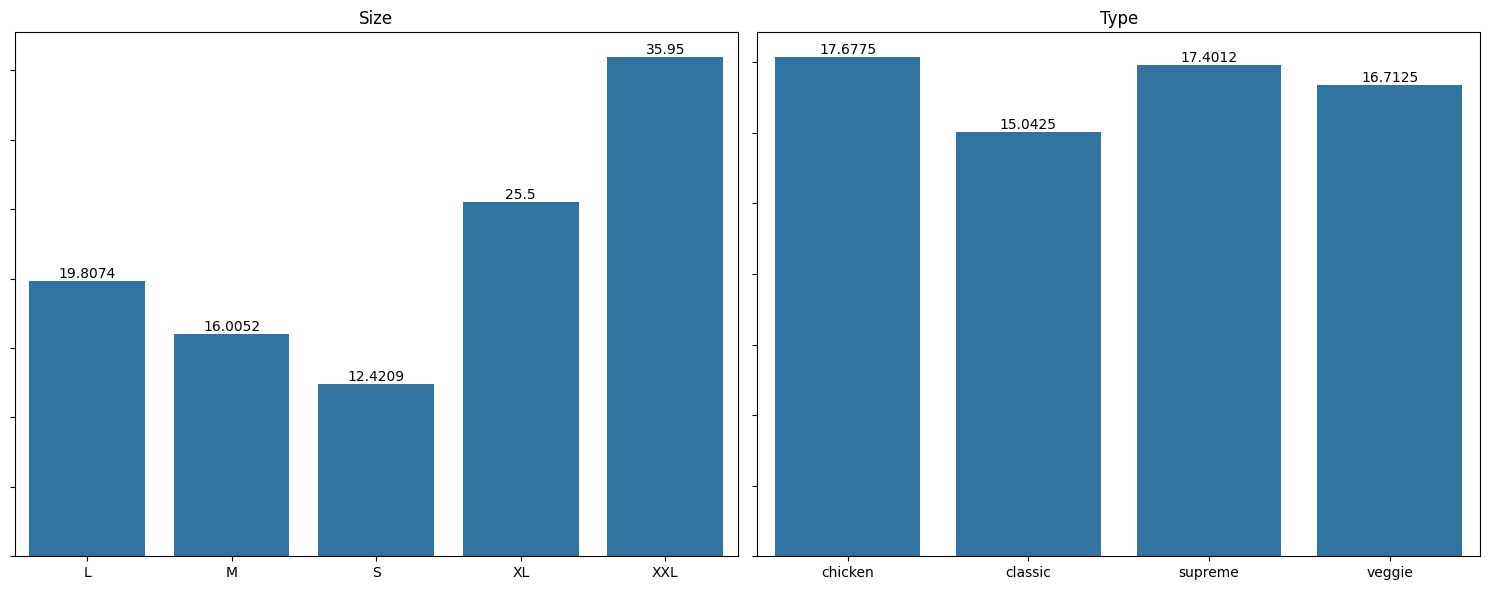

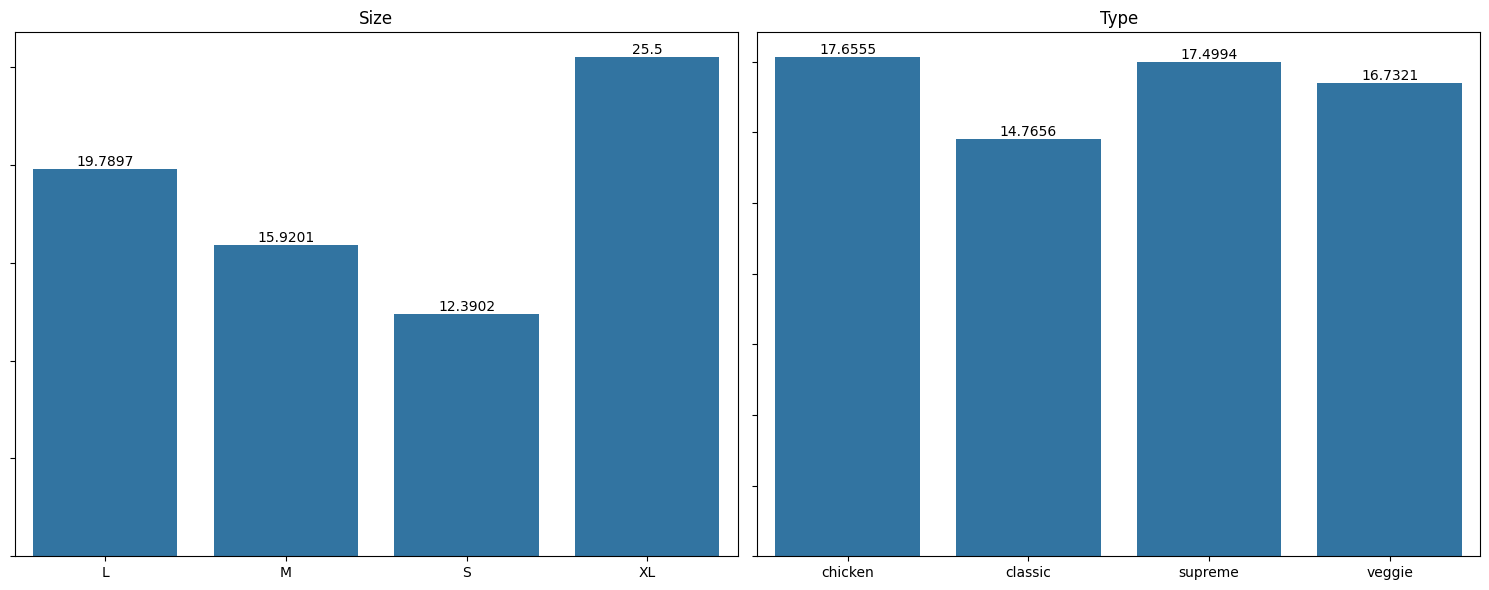

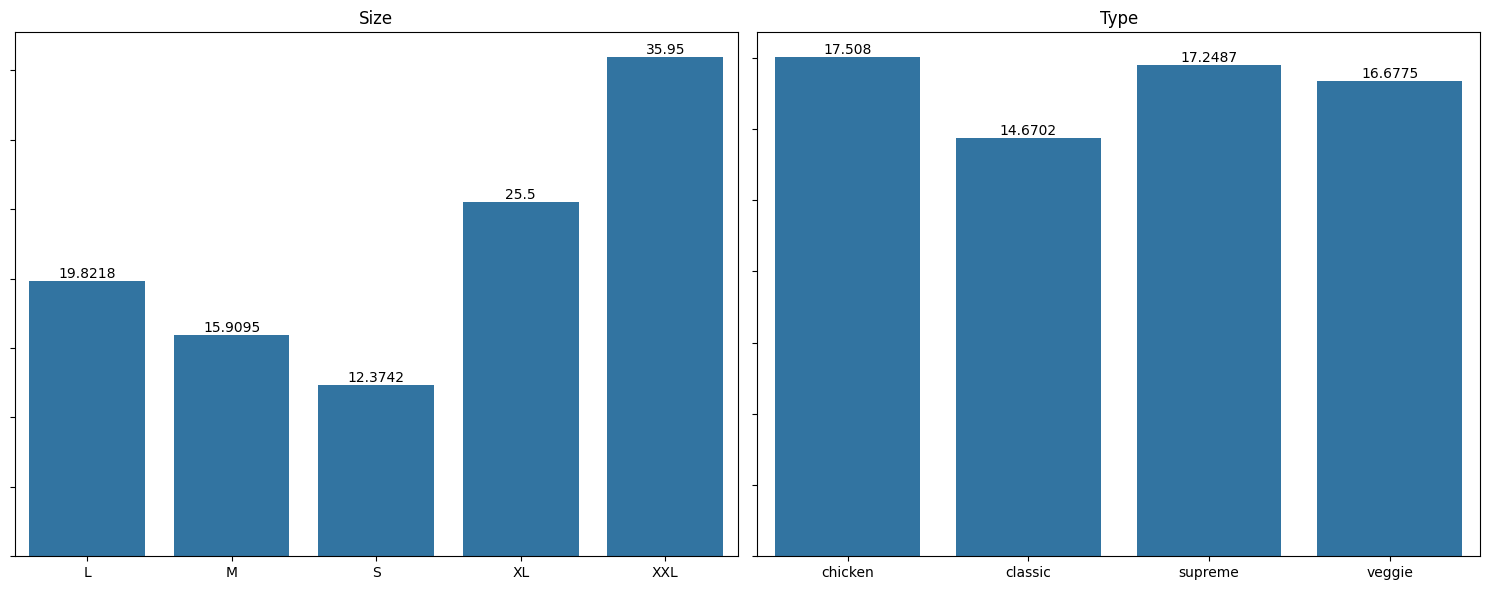

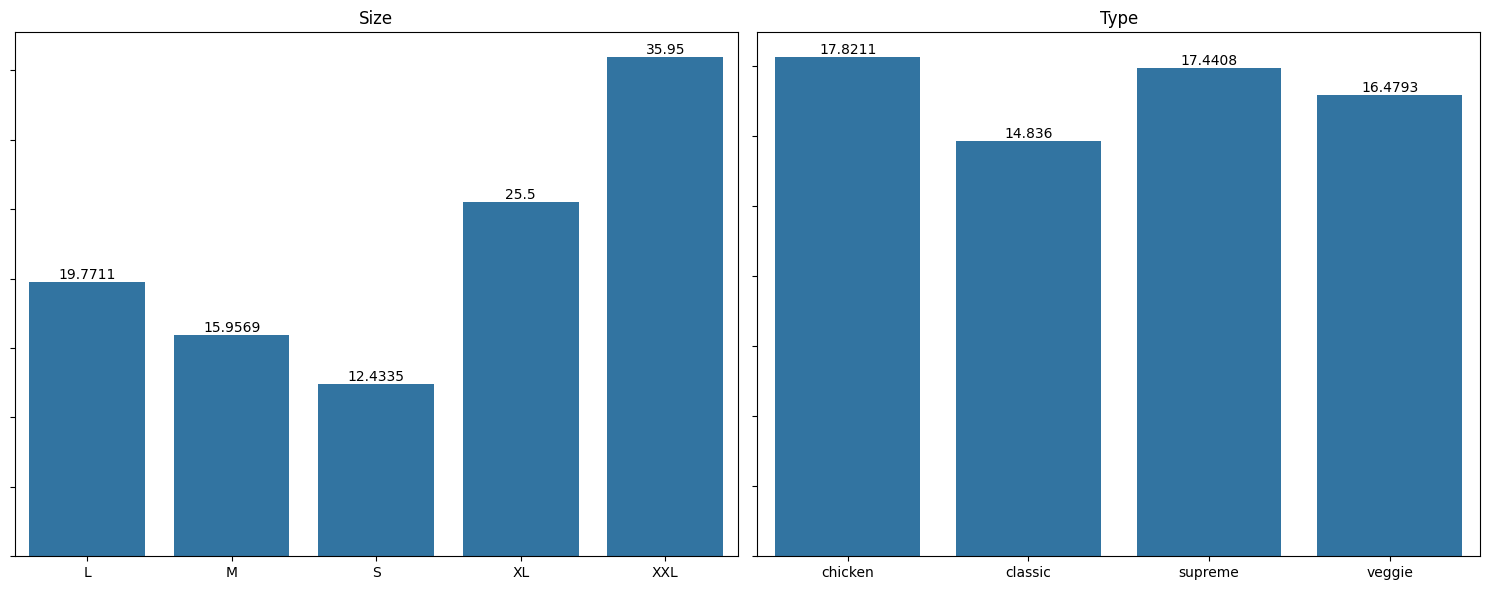

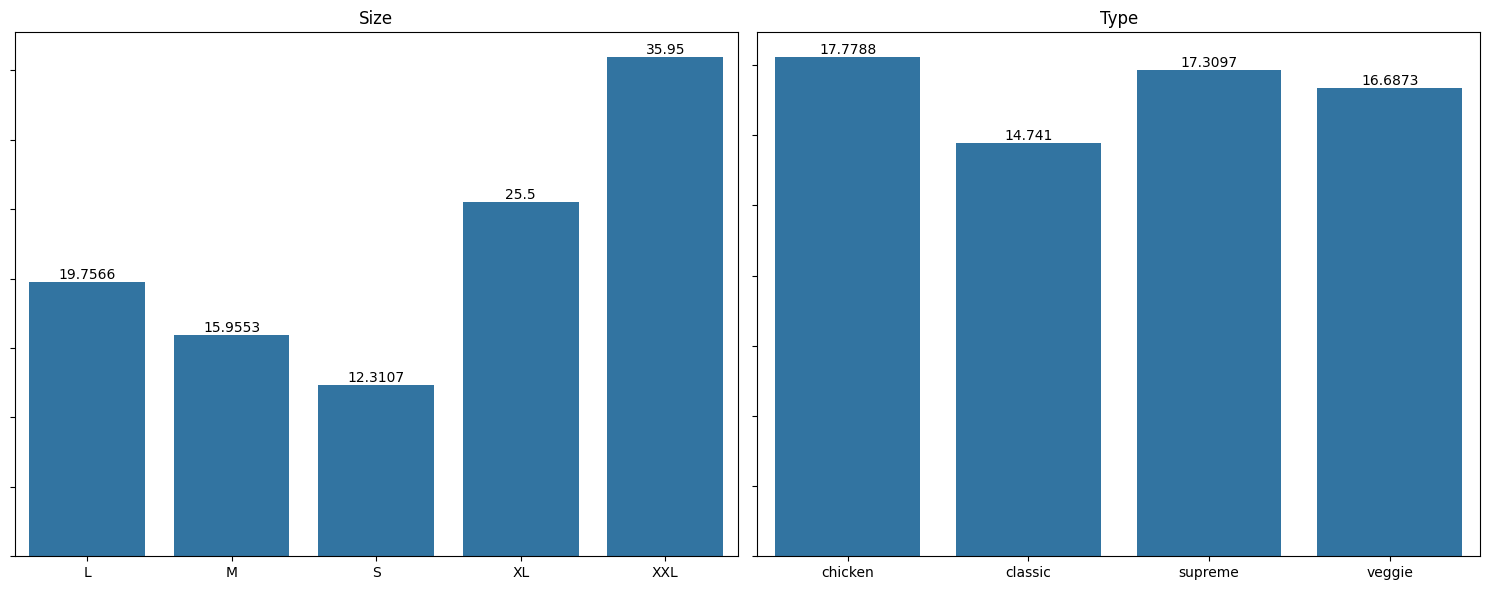

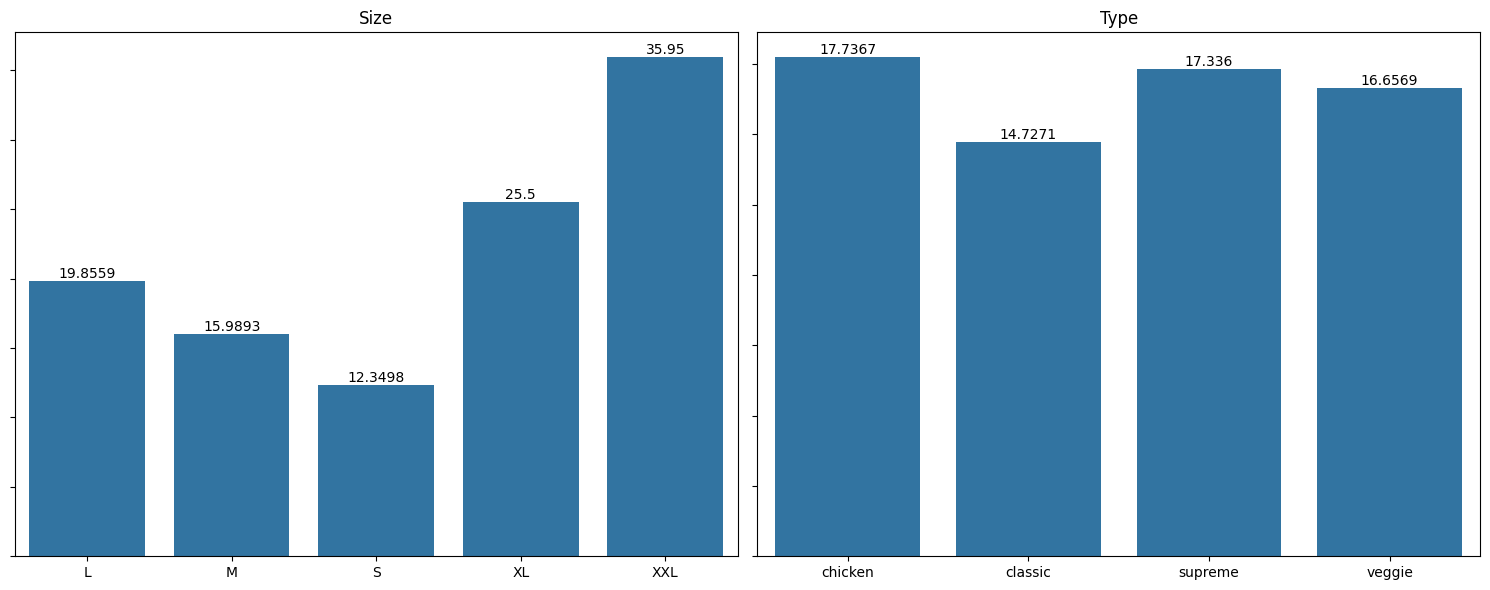

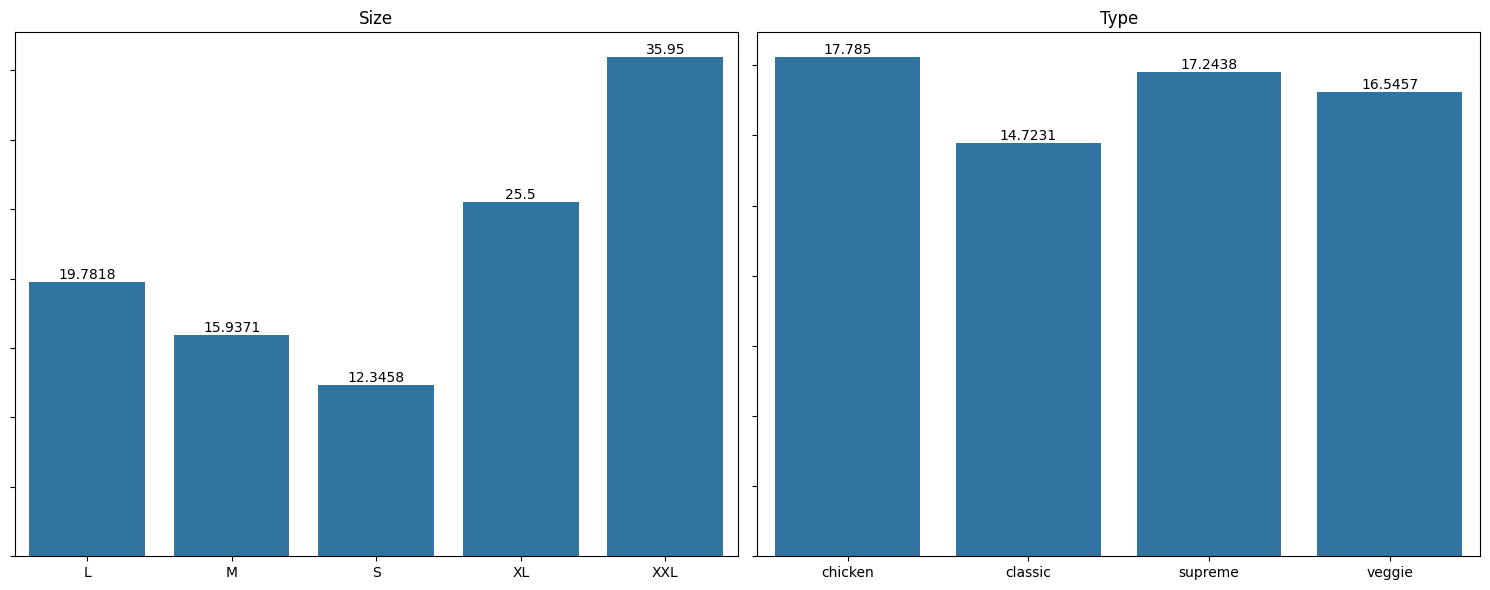

In [26]:
for l in sorted(df["months"].unique()):
    display(HTML("<h2>Average prices per each pizza type in {} 2015</h2>".format(months[l-1])))
    temp_df = df[df["months"] == l]
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
    for i, j in enumerate(["size", "type"]):
        grouped = temp_df.groupby(j)
        mean = grouped["price"].mean()
        sns.barplot(x=mean.index, y=mean, ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)
        axes[i].set_yticklabels(())
        axes[i].set_xlabel("")
        axes[i].set_title(j.capitalize())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
    plt.tight_layout()
    plt.show()